

**About Dataset**
The Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine) is a collection of attributes regarding the chemical analysis of wine from Italy from three different producers, but the same type of wine for each producer. This information could be used as an example to verify the validity of a bottle of wine made from the grapes from a specific region in Italy. The 13 attributes are Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline.



To disable Python warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Step to do:

In [7]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

# TSNE
from sklearn.manifold import TSNE



In [10]:
df=pd.read_csv('wine.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The first column contains the labels; extracting this column as labels and removing it from the dataset. 

In [11]:

labels = df.iloc[:, 0]


data_without_labels = df.iloc[:, 1:]


print("Labels:")
print(labels)
print("\nDataset without labels:")
print(data_without_labels)


Labels:
0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

Dataset without labels:
        1     2     3     4    5     6     7     8     9      10    11    12  \
0    14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
1    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
2    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
3    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
4    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
173  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
174  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
175  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
176  13.17  2.59  2.37  20.0  120

Implementing PCA

In [12]:
from sklearn.decomposition import PCA


pca = PCA(n_components=6)

# Fit PCA to the dataset and transform the data to the new reduced dimension
data_reduced = pca.fit_transform(df)

# Display the shape of the reduced dataset
print("Shape of reduced dataset:", data_reduced.shape)


Shape of reduced dataset: (178, 6)


In [13]:
print("Explained variance ratio of each component:")
print(pca.explained_variance_ratio_)


Explained variance ratio of each component:
[9.98087625e-01 1.73591851e-03 9.58948998e-05 5.13200714e-05
 1.29365230e-05 8.73476385e-06]


Creating a t-SNE model using a specified random state and a verbose value of 1

In [14]:

tsne = TSNE(random_state=42, verbose=1)


tsne_result = tsne.fit_transform(data_reduced)


print("Shape of t-SNE result:", tsne_result.shape)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.254s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.353230
[t-SNE] KL divergence after 1000 iterations: 0.104550
Shape of t-SNE result: (178, 2)


In [15]:

tsne_result = tsne.fit_transform(data_reduced)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.353230
[t-SNE] KL divergence after 1000 iterations: 0.104550


In [16]:
print("Shape of t-SNE fitted data:", tsne_result.shape)


Shape of t-SNE fitted data: (178, 2)


    Creating a scatter plot of the two-dimensional data (first and second features) 

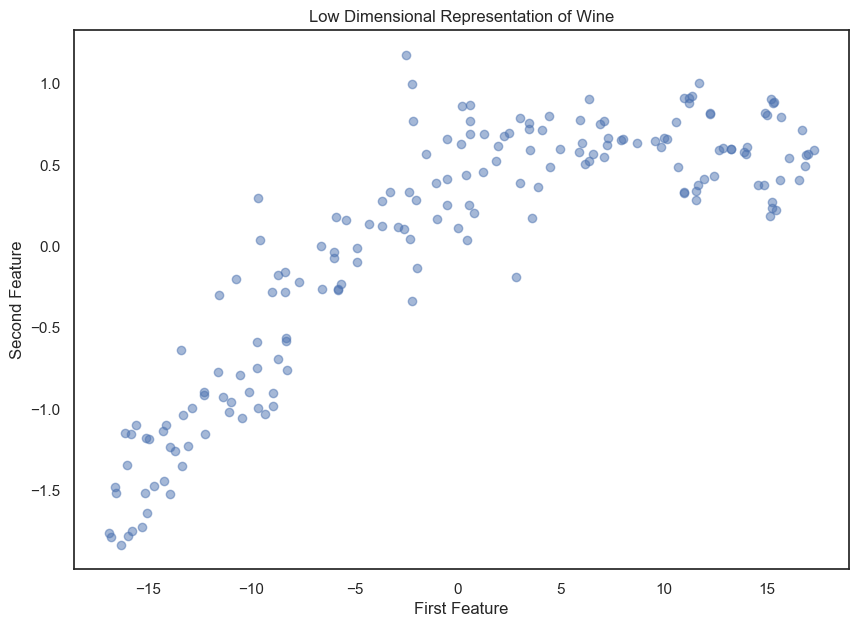

In [17]:
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:

x = tsne_result[:, 0]
y = tsne_result[:, 1]

plt.scatter(x, y, alpha=0.5)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()


 Creating a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present 

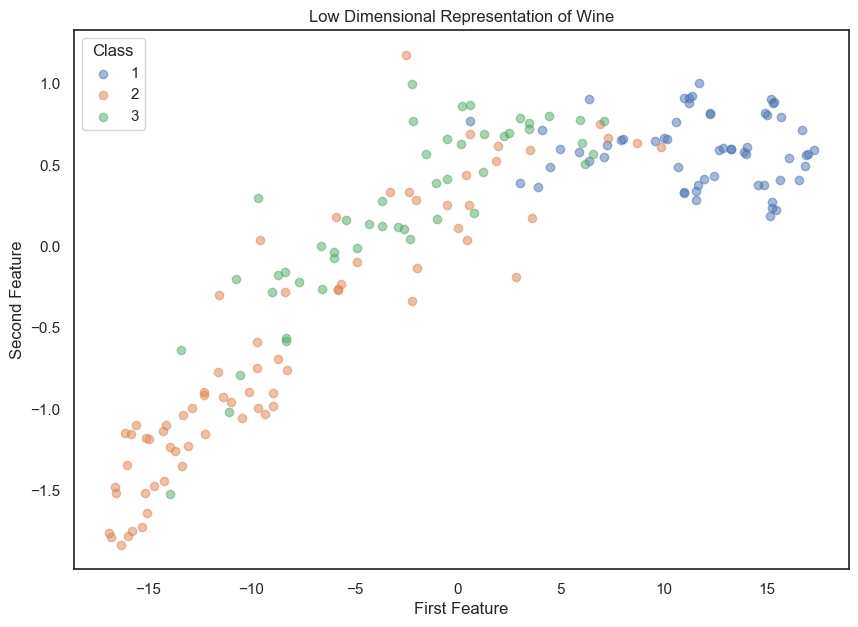

In [18]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:

x = tsne_result[:, 0]
y = tsne_result[:, 1]

for label in set(labels):
    indices = labels == label
    plt.scatter(x[indices], y[indices], label=label, alpha=0.5)

plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend(title='Class')
plt.show()


Constructing a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generating a t-SNE model with the corresponding perplexity and printing a scatter plot of the labeled wine classes. 

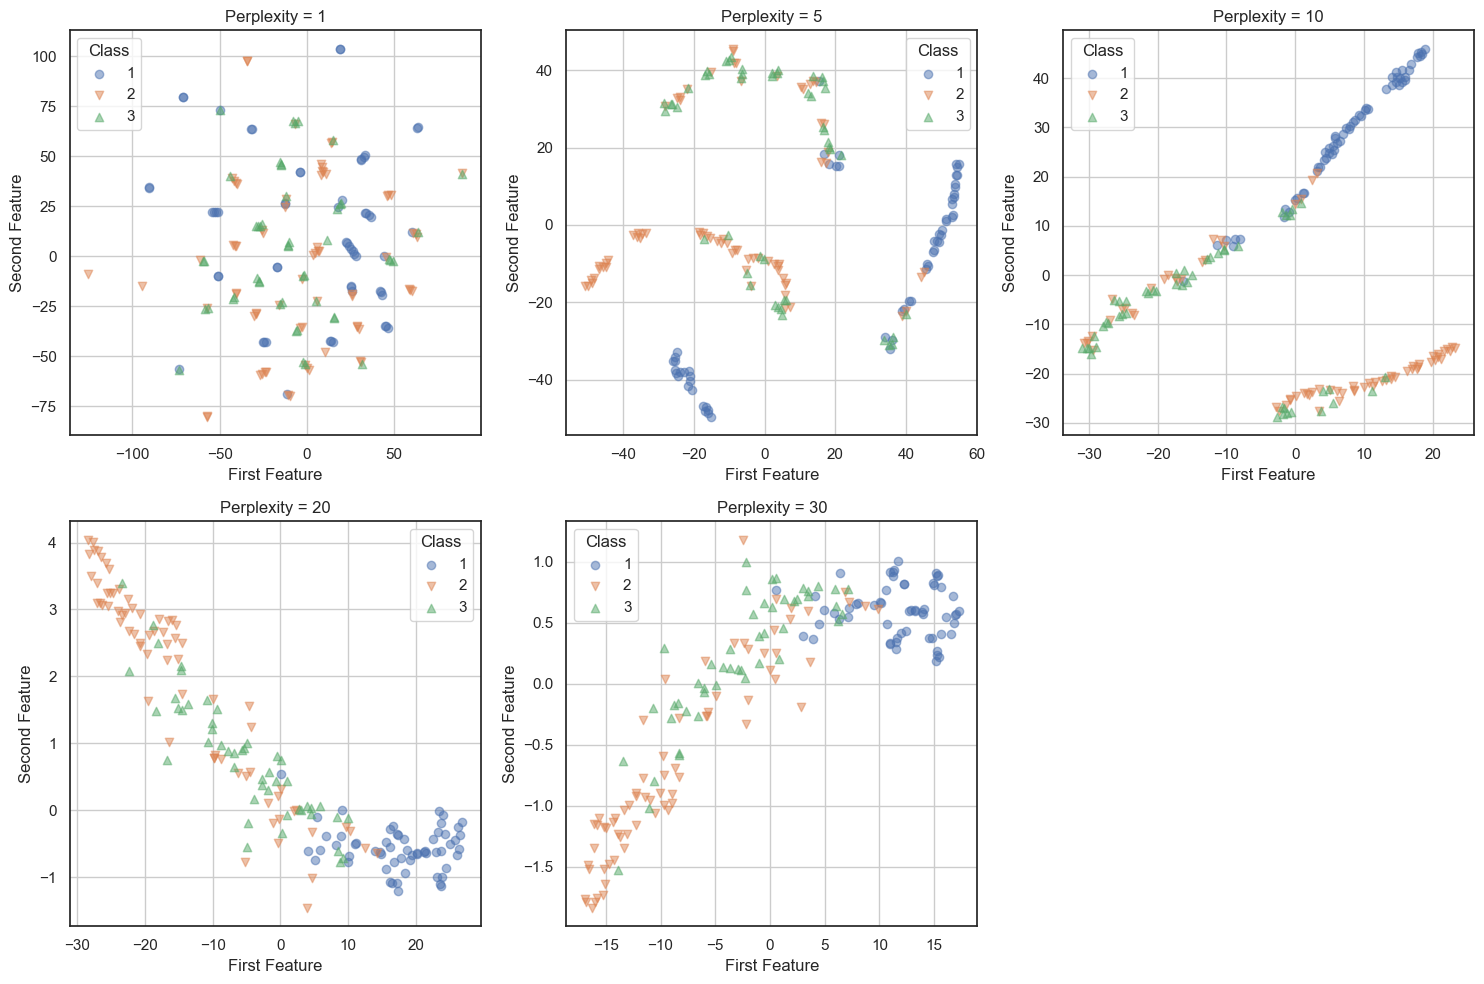

In [22]:


MARKER = ['o', 'v', '^']


perplexities = [1, 5, 10, 20, 30]

plt.figure(figsize=(15, 10))
for i, perplexity in enumerate(perplexities):
    # Initialize t-SNE model with the current perplexity
    tsne = TSNE(perplexity=perplexity, random_state=42)
    
    
    tsne_result = tsne.fit_transform(data_reduced)
    
    
    x = tsne_result[:, 0]
    y = tsne_result[:, 1]
    
    
    plt.subplot(2, 3, i+1)
    for j, label in enumerate(set(labels)):
        indices = labels == label
        plt.scatter(x[indices], y[indices], label=label, alpha=0.5, marker=MARKER[j % len(MARKER)])
    
    plt.title(f"Perplexity = {perplexity}")
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.legend(title='Class')
    plt.grid(True)

plt.tight_layout()
plt.show()


Constructing a loop that iterates through the iteration values (250, 500, 1000). For each loop, generating a t-SNE model with the corresponding number of iterations and identical number of iterations without progress values:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.353230
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 52.476932
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.353230
[t-SNE] KL diverg

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[t-SNE] KL divergence after 1000 iterations: 0.104550


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


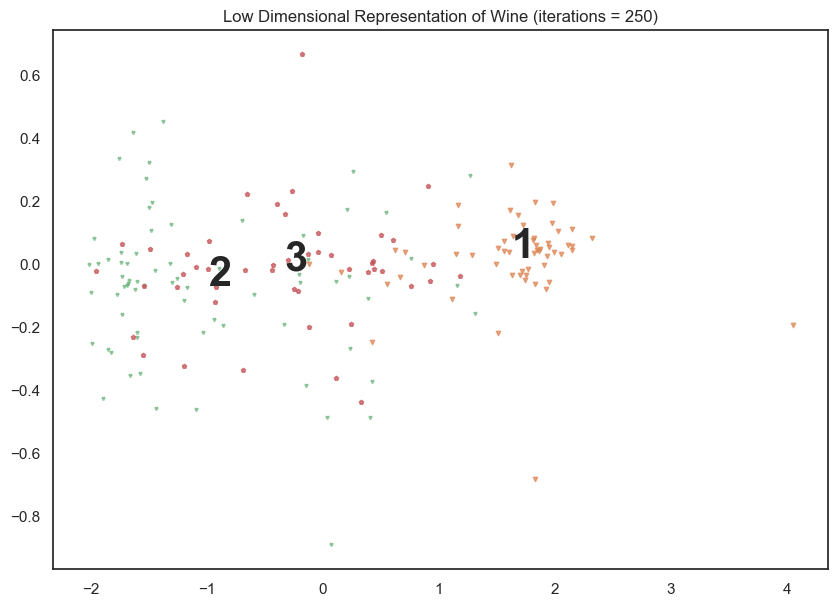

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


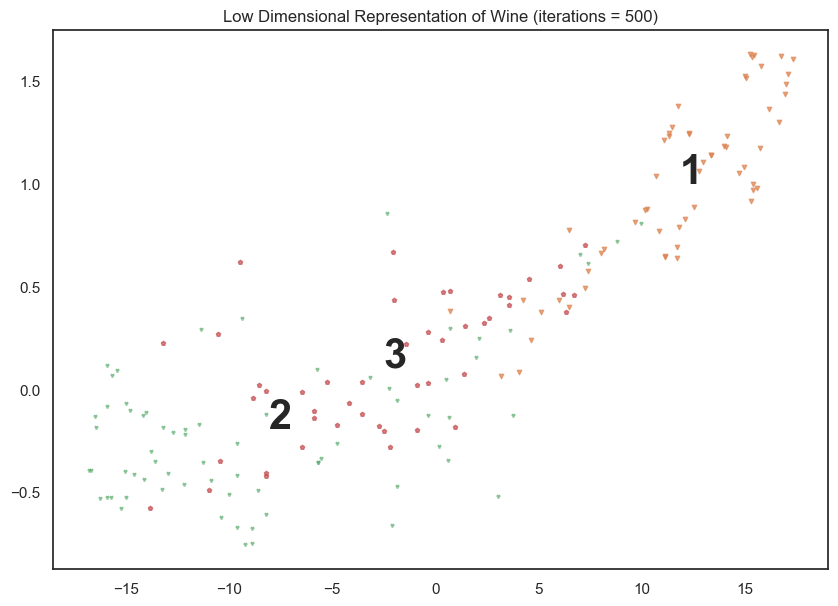

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


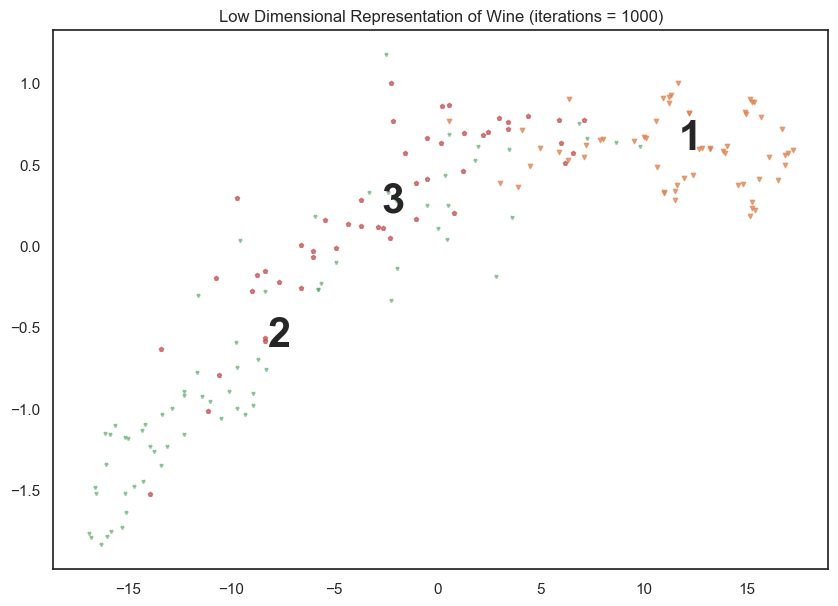

In [24]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(data_reduced)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (iterations = {iterations})');
    for i in range(10):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=10);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()